#**POISSON DISTRIBUTION**


The Poisson distribution shows the probability of a given number of events happening in a fixed interval, given that the events occur with a known constant mean rate and are independent of the time since the last event occured.

🔢 Formula:
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$
λ: average number of events per interval

k: actual number of events

e: Euler's number (≈ 2.71828)

###**Real World Example**

**Scenerio: COVID Cases in Kigali**

*What is the probability that Kigali records exactly 4 new COVID cases in a day, if the average number of daily reported cases is 2?*

We’ll assume COVID case arrivals follow a Poisson distribution, which is commonly used for modeling counts of rare events in a fixed time.

Following the Poisson Distribution formula;

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

In [11]:
# Manual factorial implementation
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

In [12]:
# Manual Poisson probability function
def poisson_probability(lmbda, k):
    e = 2.718281828459045  # Approximation of Euler's number
    return (lmbda ** k) * (e ** -lmbda) / factorial(k)

In [13]:
# Parameters
lambda_kigali = 2  # Average daily COVID cases
k_values = list(range(0, 11))  # Number of cases from 0 to 10
probabilities = [poisson_probability(lambda_kigali, k) for k in k_values]

In [14]:
# Highlight specific probability for 4 cases
specific_k = 4
p_4 = poisson_probability(lambda_kigali, specific_k)
print(f"Probability of exactly {specific_k} COVID cases in Kigali in one day: {p_4:.5f}")

Probability of exactly 4 COVID cases in Kigali in one day: 0.09022


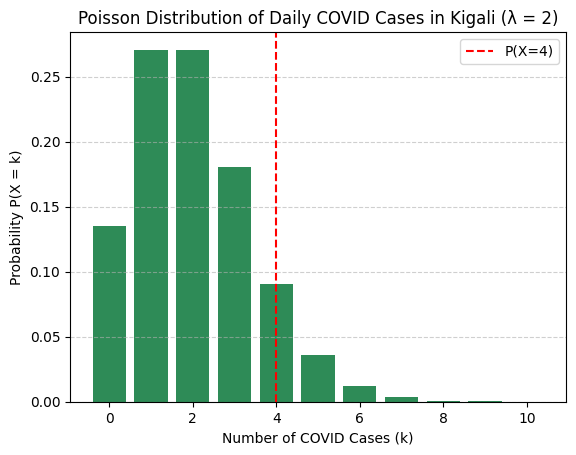

In [15]:
import matplotlib.pyplot as plt

plt.bar(k_values, probabilities, color='seagreen')
plt.axvline(specific_k, color='red', linestyle='--', label=f'P(X={specific_k})')
plt.xlabel('Number of COVID Cases (k)')
plt.ylabel('Probability P(X = k)')
plt.title('Poisson Distribution of Daily COVID Cases in Kigali (λ = 2)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#**BAYESIAN PROBABILITY**

**Scenario Explanation:**


Lets say you are planning an event and you're trying to figure out if you should postpone the event due to the possibility of rainfall.
The chance of rain on any day is 15%.
On the morning of the event, it's cloudy.
The probability of it being cloudy on any day is 25%, and on days when it rains, it's cloudy in the morning 80% of the time.

With this information, you can use Bayesian probability to enhance your decision.


In [10]:
# Define the probabilities
P_rain = 0.15                     # Prior: Probability it rains on any given day
P_cloudy_given_rain = 0.80       # Likelihood: Probability it's cloudy given that it rains
P_cloudy = 0.25                  # Evidence: Overall probability of a cloudy morning

# Bayes' Theorem: P(Rain | Cloudy) = (P(Cloudy | Rain) * P(Rain)) / P(Cloudy)

# Step 1: Prior
print("Step 1: Prior - P(Rain) =", P_rain)

# Step 2: Likelihood
print("Step 2: Likelihood - P(Cloudy | Rain) =", P_cloudy_given_rain)

# Step 3: Evidence
print("Step 3: Evidence - P(Cloudy) =", P_cloudy)

# Step 4: Posterior
numerator = P_cloudy_given_rain * P_rain
posterior = numerator / P_cloudy

print("Step 4: Posterior - P(Rain | Cloudy) =", round(posterior, 4))


Step 1: Prior - P(Rain) = 0.15
Step 2: Likelihood - P(Cloudy | Rain) = 0.8
Step 3: Evidence - P(Cloudy) = 0.25
Step 4: Posterior - P(Rain | Cloudy) = 0.48


**Practical Significance of Bayesian Inference**

Bayesian inference allows you to update your beliefs in light of new evidence.

Before you see the cloudy sky, you believe there's a 15% chance of rain.

After observing that it’s cloudy, you update that belief to a 48% chance of rain.

This is powerful because it:

1. Incorporates new data logically and mathematically.

2. Works well under uncertainty (even with small sample sizes).

3. Helps in decision-making by quantifying risk.

#**Gradient Descent In Code**

Compute three updates of the gradient descent algorithm for the parameters m and b in a simple linear regression model.

Given the linear equation:

y = mx + b

where:

Initial m = -1

Initial b = 1

Learning rate = 0.1

Given points: (1,3) and (3,6)

In [1]:
import matplotlib.pyplot as plt

# Initial parameters
m = -1
b = 1
learning_rate = 0.1
iterations = 3

# Given data points
X = [1, 3]
Y = [3, 6]

# Store history for plotting
m_history = [m]
b_history = [b]
y_preds = [m * x + b for x in X]
initial_error = sum([(y_hat - y) ** 2 for y_hat, y in zip(y_preds, Y)]) / len(X)
error_history = [initial_error]

In [2]:
# Gradient Descent
for i in range(iterations):
    # Predictions with current m and b
    y_preds = [m * x + b for x in X]

    # Mean Squared Error
    error = sum([(y_hat - y) ** 2 for y_hat, y in zip(y_preds, Y)]) / len(X)

    # Gradients
    dm = sum([(y_hat - y) * x for y_hat, y, x in zip(y_preds, Y, X)]) * (2 / len(X))
    db = sum([(y_hat - y) for y_hat, y in zip(y_preds, Y)]) * (2 / len(X))

    # Update m and b
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Store history
    m_history.append(m)
    b_history.append(b)
    error_history.append(error)

# Final predictions
final_predictions = [m * x + b for x in X]

# Print final results
print(f"Final m: {m:.4f}")
print(f"Final b: {b:.4f}")
print(f"Predictions: {final_predictions}")

Final m: 1.3400
Final b: 1.9160
Predictions: [3.256, 5.936]


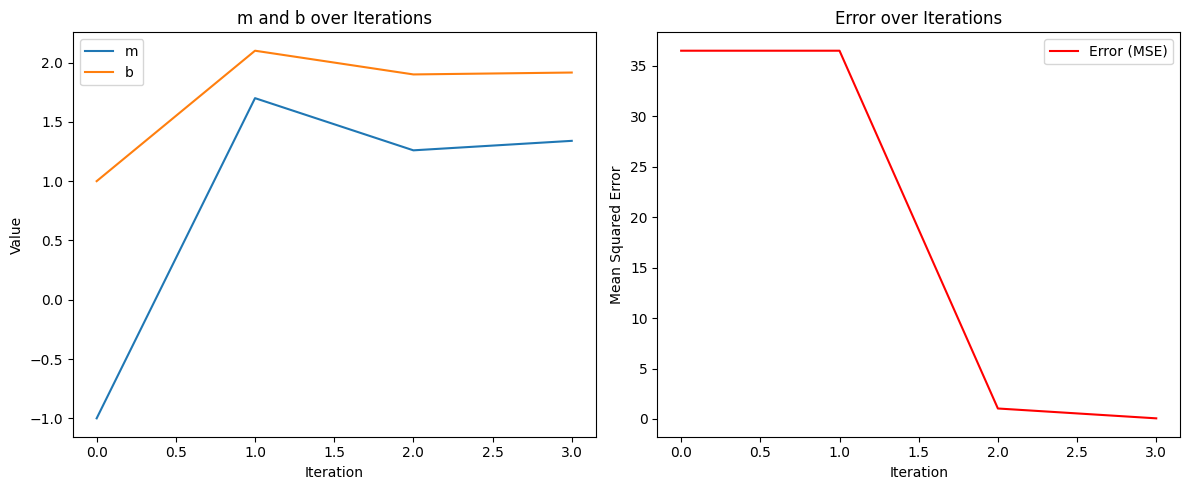

In [3]:
# Plotting
plt.figure(figsize=(12, 5))

# m and b
plt.subplot(1, 2, 1)
plt.plot(m_history, label='m')
plt.plot(b_history, label='b')
plt.title('m and b over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

# Error
plt.subplot(1, 2, 2)
plt.plot(error_history, label='Error (MSE)', color='red')
plt.title('Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()